In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./big_data.csv")

In [3]:
type(df.Name)

pandas.core.series.Series

In [4]:
df[["Name", "Sex"]]

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male
...,...,...
886,"Montvila, Rev. Juozas",male
887,"Graham, Miss. Margaret Edith",female
888,"Johnston, Miss. Catherine Helen ""Carrie""",female
889,"Behr, Mr. Karl Howell",male


In [5]:
type(df[["Name", "Sex"]])

pandas.core.frame.DataFrame

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.drop("Cabin", axis=1, inplace=True)

In [8]:
df["Age"].fillna(int(df["Age"].mean()), inplace=True)

C:\Users\91930\AppData\Local\Temp\ipykernel_14160\1473316542.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(int(df["Age"].mean()), inplace=True)


In [9]:
df.fillna({"Age":int(df["Age"].mean())}, inplace=True)

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
df["Embarked"].ffill().bfill()

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [12]:
df[["Survived", "Sex"]].value_counts()

Survived  Sex   
0         male      468
1         female    233
          male      109
0         female     81
Name: count, dtype: int64

In [13]:
df[((df["Survived"] == 0) & (df["Sex"] == "male"))].Name

0             Braund, Mr. Owen Harris
4            Allen, Mr. William Henry
5                    Moran, Mr. James
6             McCarthy, Mr. Timothy J
7      Palsson, Master. Gosta Leonard
                    ...              
881                Markun, Mr. Johann
883     Banfield, Mr. Frederick James
884            Sutehall, Mr. Henry Jr
886             Montvila, Rev. Juozas
890               Dooley, Mr. Patrick
Name: Name, Length: 468, dtype: object

In [14]:
df.groupby(["Survived", "Pclass"])["Name"].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Name, dtype: int64

In [15]:
df.groupby(["Sex"])["Age"].mean()

Sex
female    28.098726
male      30.355581
Name: Age, dtype: float64

In [16]:
df.groupby(["Survived", "Pclass"])["Age"].mean()

Survived  Pclass
0         1         40.756250
          2         33.216495
          3         27.225806
1         1         34.712647
          2         26.044023
          3         23.032941
Name: Age, dtype: float64

In [17]:
df.groupby(["Survived", "Pclass"])["Age"].agg(["mean","max","min","count"])

mean   max    min  count
Survived Pclass                               
0        1       40.756250  71.0   2.00     80
         2       33.216495  70.0  16.00     97
         3       27.225806  74.0   1.00    372
1        1       34.712647  80.0   0.92    136
         2       26.044023  62.0   0.67     87
         3       23.032941  63.0   0.42    119

In [18]:
def check_fare(fare):
    if fare > 50:
        return "High"
    return "Low"

In [19]:
df["Fare_type"] = df["Fare"].apply(lambda x:"High" if x > 50 else "Low") # or .apply(check_fare)

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Low
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Low
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,S,Low
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Low


In [21]:
df["New_name"] = df["Name"].apply(lambda x:x.upper())

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_type,New_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Low,"BRAUND, MR. OWEN HARRIS"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,High,"CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH..."
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Low,"HEIKKINEN, MISS. LAINA"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,High,"FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Low,"ALLEN, MR. WILLIAM HENRY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Low,"MONTVILA, REV. JUOZAS"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Low,"GRAHAM, MISS. MARGARET EDITH"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,S,Low,"JOHNSTON, MISS. CATHERINE HELEN ""CARRIE"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Low,"BEHR, MR. KARL HOWELL"


<Axes: >

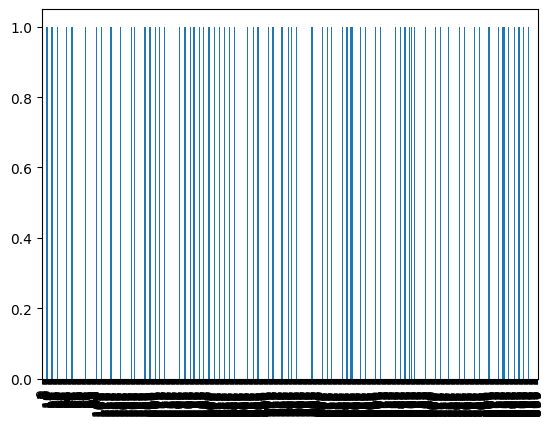

In [23]:
import matplotlib.pyplot as plt

df['Survived'].plot(kind='bar')

In [28]:
count = df["Sex"].value_counts()
x = count.index
y = count.values

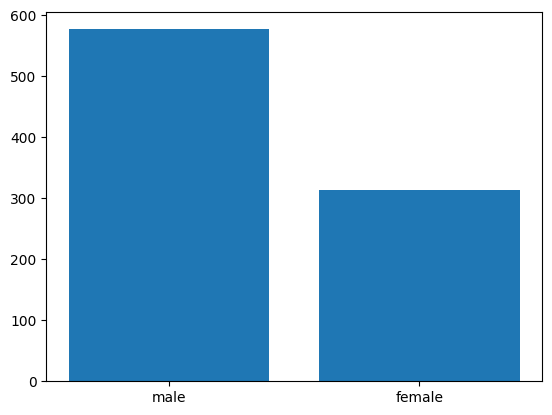

In [ ]:
plt.bar(x,y)
plt.show()

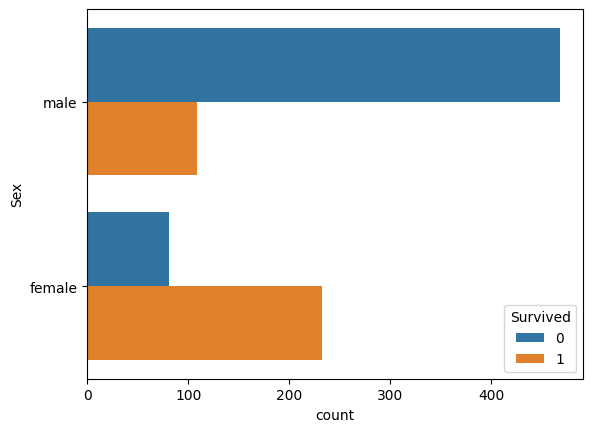

In [39]:
sns.countplot(data=df, y="Sex", hue="Survived")
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

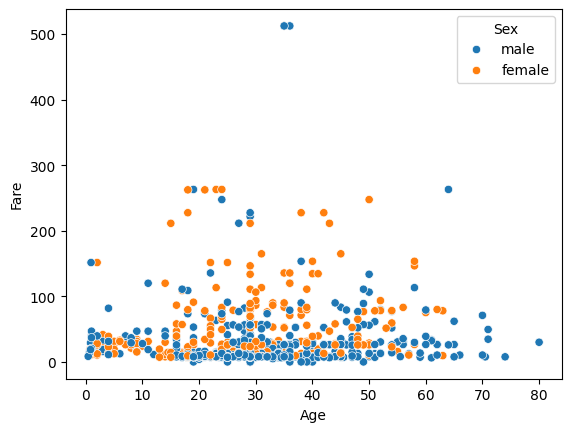

In [55]:
sns.scatterplot(data=df, x="Age", y='Fare', hue="Sex")